<a href="https://colab.research.google.com/github/zarrinan/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/U2_S1_D2_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [88]:
def calcstats(alist):
  c = 0
  for a in alist:
    c += a
  mean = c/len(alist) 
  var = sum((a - mean) ** 2 for a in alist) / (len(alist)) #for a population
  stdev = var ** 0.5
  return mean, var, stdev
calcstats( [3505, 2400, 3027, 2798, 3700, 3250, 2689])

(3052.714285714286, 183761.06122448976, 428.67360686714756)

In [86]:
print ('mean', np.mean(sales))
print ('variance', np.var(sales))
print ('standard deviation', np.std(sales))

mean 3052.714285714286
variance 183761.06122448976
standard deviation 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [89]:
sales =  [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers = [127, 80, 105, 92, 120, 115, 93]
covar = np.cov(sales, customers, ddof=0)
cov = covar[0][1]
print('Covariance:',cov)

Covariance: 6518.020408163265


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [93]:
def stdev(num):
  mean = sum(num) / len(num)
  var = sum((x - mean)**2 for x in num) / len(num)
  stdev = var ** 0.5
  return stdev

print ('Standard Deviation of Customer visits',stdev(customers))

def corrcoef(list1, list2):
  list1stdev = stdev(list1)
  list2stdev = stdev(list2)
  corrcoef = cov/(list1stdev * list2stdev)
  return corrcoef

print('Correlation coefficient:',corrcoef(sales, customers))
  
  

Standard Deviation of Customer visits 15.792015549069118
Correlation coefficient: 0.9628339778148909


In [0]:
np.corrcoef(sales, customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [94]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col = 0)
df.describe()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [95]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [96]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [97]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


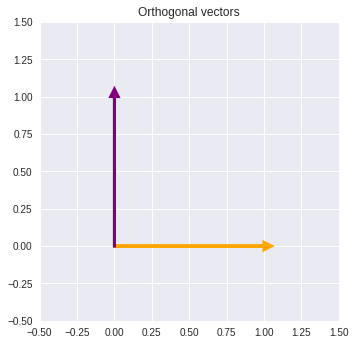

In [0]:
'orthogonal = perpendicular'
# Axis Bounds
plt.xlim(-0.5,1.5)          
plt.ylim(-0.5,1.5)

# Unit Vectors
i = [1,0]
j = [0,1]

# Fix Axes
plt.axes().set_aspect('equal')

# PLot Vectors
plt.arrow(0, 0, i[0], i[1], linewidth=3, head_width=.05, head_length=0.05, color ='orange')
plt.arrow(0, 0, j[0], j[1], linewidth=3, head_width=.05, head_length=0.05, color ='purple')
plt.title("Orthogonal vectors")
plt.show();

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a.b = -30 -24 + 14 = -40
'these vectors are not orthogonal, because the dot product of the two is not equal to zero'

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
'1.' normsqrd = 4+225+36+400 = 665
'2.' c.c = 4 + 225 + 26 + 400 = 665
'3.' ctc = 665
'The result of all three calculations is the same'

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0  \end{bmatrix} -8\begin{bmatrix} 0 \\ 0 \\ 1  \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8 \hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [99]:
norm = np.sqrt(16+144+121+81+4)
print(norm)
unit_vector = [4/19, 12/19, 11/19, 9/19, 2/19]
print(unit_vector)

##OR using np

f = [4, 12, 11, 9, 2]
f_norm = np.linalg.norm(f)
f_unit_vector = [i/f_norm for i in f]
print (f_unit_vector)

19.131126469708992
[0.21052631578947367, 0.631578947368421, 0.5789473684210527, 0.47368421052631576, 0.10526315789473684]
[0.20908334939572668, 0.62725004818718, 0.5749792108382483, 0.470437536140385, 0.10454167469786334]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

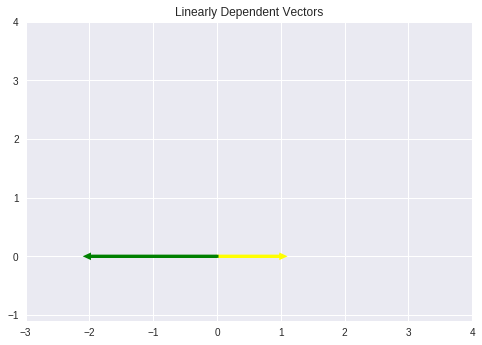

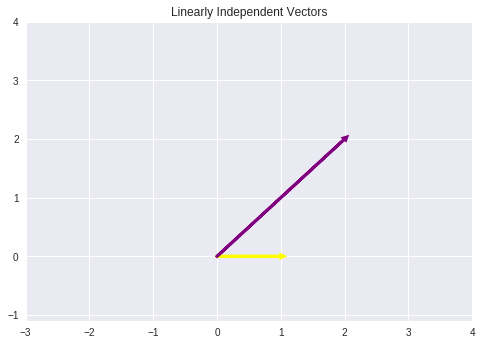

In [103]:

# Axis Bounds
plt.xlim(-3,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,0] 
v1 = [-2,0]
v2 = [2,2]


# Plot Vectors
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v1[0], v1[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.title("Linearly Dependent Vectors")
plt.show()


plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='purple')
plt.title("Linearly Independent Vectors")
plt.xlim(-3,4)          
plt.ylim(-1.1,4)
plt.show()

In [0]:
###in D3

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

The span of g and h is R1, because they are collinear

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

The span of l, m, and n is R3, because they are independent

In [0]:
v = c1[1 2 3] + c2[-1 0 7] + c3[4 8 2]
'where c1, c2, c3 are any real numbers'

# Basis


## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



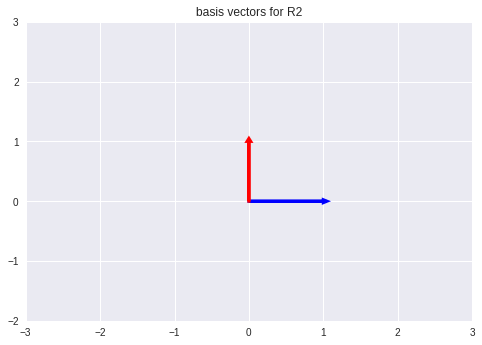

In [54]:

# Axis Bounds
plt.xlim(-3,3)          
plt.ylim(-2,3)

i = [1, 0]
j = [0, 1]
plt.arrow(0,0, i[0], i[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, j[0], j[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.title("basis vectors for R2")
plt.show()

## 6.2 What does it mean to form a basis?

A basis of a vector space is formed by a set of vectors, which are  linearly independent


# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

the Rank of P is 3

In [104]:
P = np.mat('1 2 3; -1 0 7; 4 8 2')
print ('Rank:', np.linalg.matrix_rank(P))

Rank: 3


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the number of dimensions spanned by its column vectors 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

\begin{align}
proj_{L}(w) =  \frac{w \cdot v}{v \cdot v}v
\end{align}


## graph your projected vector to check your work (make sure your axis are square/even)

[0.5 1.5]


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


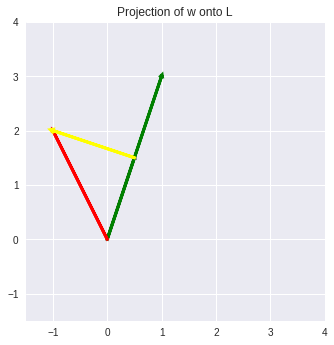

In [107]:
# Original Vector
v = [1, 3] 
w = [-1 ,2]

# proj = -1 + 6/1+9 [1 3] = 1/2[1 3]
proj = [1/2, 3/2]

#check the projection:
proj1 = np.multiply((np.dot(w,v) / np.dot(v,v)),v) 
print(proj1)

# Axis Bounds
plt.xlim(-1.5,4)          
plt.ylim(-1.5,4)

x_minus_proj = np.subtract(w, proj)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Plot Vectors and L
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.03, head_length=0.03, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.03, head_length=0.03, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.02, head_length=0.02, color ='red')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

plt.title("Projection of w onto L")
plt.show();

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

\begin{align}
proj_{L}(w) =  \frac{w \cdot v}{v \cdot v}v
\end{align}


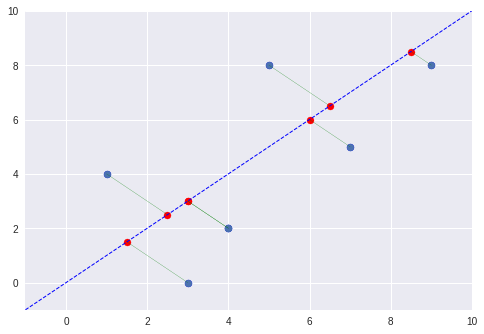

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5]
y_values = [4, 2, 5, 0, 8, 2, 8]
v = [1, 1]


def plotdots(x,y,v):
  x_dots = []
  y_dots = []
  for w in zip(x,y):
    proj = np.multiply((np.dot(w,v) / np.dot(v,v)),v)
    x_dots.append(proj[0])
    y_dots.append(proj[1])
  fig, ax = plt.subplots()  
  # Axis Bounds
  plt.xlim(-1,10)          
  plt.ylim(-1,10)
  
  # Get Vals for L
  x_vals = np.array(axes.get_xlim())
  y_vals = x_vals

  # Plot Original Vectors and L
  ax.plot(x_vals, y_vals, '--', color='b', linewidth=1)
  data = {"x": x_values, "y": y_values}
  df = pd.DataFrame(data)
  ax.scatter(df.x, df.y, color='blue')
  
  #Plot the projected dots
  ax.scatter(x,y)
  ax.scatter(x_dots, y_dots, color='red')
  
  for line in zip(x_values, y_values, x_dots, y_dots):
    ax.arrow(line[0], line[1], line[2]-line[0], line[3]-line[1], linewidth=0.1,color='green')

  plt.show()
  
  
plotdots(x_values,y_values,v)  


